# How to handle Categorical data

## Frequent Category imputation

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [3]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [4]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency  with every category

<Axes: xlabel='BsmtQual'>

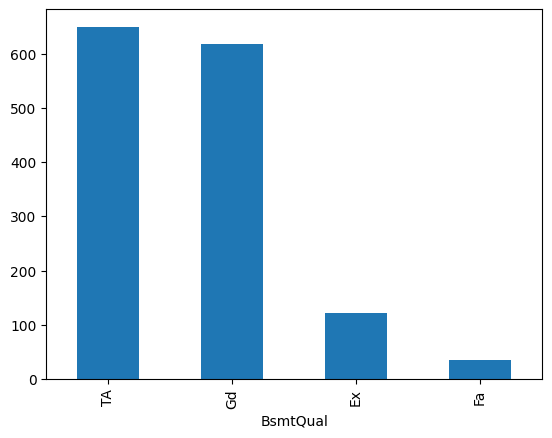

In [5]:
# df['BsmtQual'].value_counts().plot.bar()
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: xlabel='GarageType'>

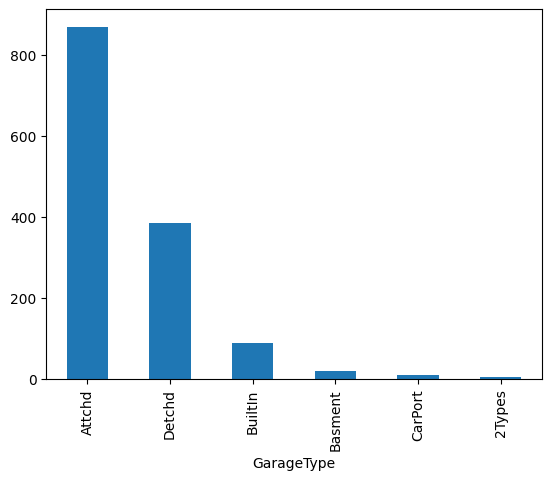

In [6]:
df['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

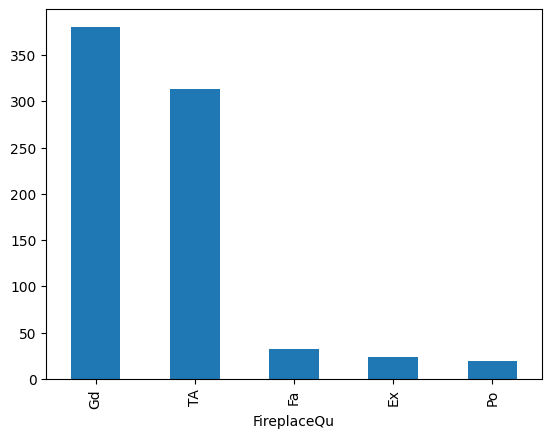

In [7]:
df['FireplaceQu'].value_counts().plot.bar()

In [8]:
# Replacing function
def impute_nan(df,variable):
    most_freq_cat=df[variable].value_counts().index[0]  #df[variable].mode()[0]
    df.fillna({variable:most_freq_cat}, inplace=True)

In [9]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']:
    impute_nan(df,feature)


In [10]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages:
1. Eaasy to implement
2. Faster way to implement

#### Disadvantages:
1. Since we are using the more frequent labels,it may use them in an over representative way, if there are many NANs
2. It distorts the relation of the most frequent labels

## Adding a variable to capture NAN

In [11]:
df['BmstQual']=np.where(df['BsmtQual'].isnull(),1,0)

In [12]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BmstQual
0,Gd,Gd,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [13]:
frequent=df['BsmtQual'].mode()

In [14]:
df.BsmtQual.mode()[0]

'TA'

In [15]:
df.fillna({'BsmtQual':frequent},inplace=True)

In [16]:
print(df.BsmtQual.isnull().mean())

0.0


In [17]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)

In [18]:
freq=df['FireplaceQu'].mode()[0]

In [19]:
freq

'Gd'

In [20]:
df.fillna({'FireplaceQu':freq},inplace=True)

In [21]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BmstQual,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [23]:
print(df.FireplaceQu.isnull().mean())

0.0


### Note: If you have more Frequent categories, We just replace NAN with a new category

In [24]:
df=pd.read_csv("train.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [25]:
def impute_nan(df, variable):
    df[variable+'_newvar']=np.where(df[variable].isnull(),"missing",df[variable])

In [27]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']:
    impute_nan(df,feature)

In [28]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


In [29]:
df.isnull().mean()

BsmtQual              0.025342
FireplaceQu           0.472603
GarageType            0.055479
SalePrice             0.000000
BsmtQual_newvar       0.000000
FireplaceQu_newvar    0.000000
GarageType_newvar     0.000000
SalePrice_newvar      0.000000
dtype: float64

In [32]:
df=df.drop(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'],axis=1)

In [33]:
df.head()

,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
